In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Train Dataset: GT Pol

In [4]:
df = pd.read_csv(r'drive/MyDrive/Colab Notebooks/BPP/GT_TrainData_Pol.csv')
df

,Unnamed: 0,REGION,TIPO_COSECHA,CUADRANTE,ALTITUD,VARIEDAD,TIPO_RIEGO,DOSIS,PRODUCTO,ADMINISTRACION,...,HUMEDAD_EDAD,NDVI_POND15,AGUA_POND15,HUMEDAD_POND15,NDVI_POND1630,AGUA_POND1630,HUMEDAD_POND1630,NDVI_POND30,AGUA_POND30,HUMEDAD_POND30
0,389,REGION3,MECANICO,CENTRO MEDIO,MEDIO,CG02-163,ASPERSION,0,BIOESTIMULANTE,BA,...,72.18966,0.69856,0.03318,71.15618,0.78732,0.04725,72.02922,0.76035,0.05265,72.43728
1,390,REGION3,MECANICO,CENTRO MEDIO,MEDIO,CG02-163,ASPERSION,12,SEMI-COMERCIAL,BA,...,71.67102,0.68836,0.03770,70.68211,0.74760,0.04081,70.51967,0.77255,0.04589,71.91617
2,391,REGION6,MANUAL,CENTRO ESTE ALTO,ALTO,CP73-1547,ASPERSION,10,GLIFOSATO,BA,...,71.48962,0.48986,0.01214,70.26754,0.65178,0.02656,70.72991,0.69965,0.03638,71.18808
3,392,REGION6,MANUAL,CENTRO ESTE ALTO,ALTO,CP73-1547,ASPERSION,13,TRINEXAPAC,BA,...,68.69715,0.54860,0.02526,71.47844,0.67050,0.03449,71.73928,0.70185,0.04010,72.13779
4,393,REGION6,MANUAL,CENTRO ESTE ALTO,ALTO,CP73-1547,ASPERSION,11,SEMI-COMERCIAL,BA,...,68.70970,0.46492,0.01911,52.62800,0.65331,0.02903,69.91241,0.68608,0.03725,70.36250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,5595,REGION1,TBD,CENTRO OESTE BAJO,BAJO,CG02-163,ASPERSION,0,PROTECTANTE,BA,...,62.25836,0.58692,0.02836,70.01170,0.63899,0.03377,70.46996,0.69068,0.03880,71.28431
2866,5596,REGION1,MANUAL,CENTRO OESTE BAJO,BAJO,CG02-163,ASPERSION,8,SEMI-COMERCIAL,BA,...,72.50764,0.72871,0.03824,70.59298,0.79178,0.04664,70.95974,0.79275,0.05107,71.93651
2867,5597,REGION3,MANUAL,CENTRO MEDIO,MEDIO,VAR.REPROD,ASPERSION,0,PROTECTANTE,BA,...,72.66447,0.59519,0.02797,69.47688,0.60675,0.02832,70.10486,0.54148,0.02832,71.50203
2868,5598,REGION1,MECANICO,CENTRO OESTE BAJO,BAJO,CG02-163,ASPERSION,0,PROTECTANTE,BA,...,74.06109,0.64706,0.05032,70.31961,0.68508,0.03753,70.96627,0.72056,0.04255,71.39283


### GT Pol Distribution

<Axes: xlabel='Pol', ylabel='Count'>

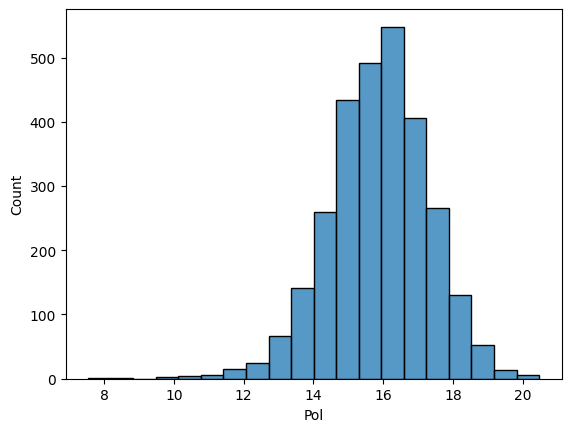

In [7]:
sns.histplot(data=df, x="Pol",bins=20)

### Interquartile Range

In [39]:
print("First Quartile, 25% quantile:",df.Pol.quantile(0.25))
print("Third Quartile, 75% quantile:",df.Pol.quantile(0.75))
print("Interquantile Range:",df.Pol.quantile(0.75)-df.Pol.quantile(0.25))


First Quartile, 25% quantile: 15.006085
Third Quartile, 75% quantile: 16.81076
Interquantile Range: 1.8046749999999978


### Correlation with Pol

<Axes: >

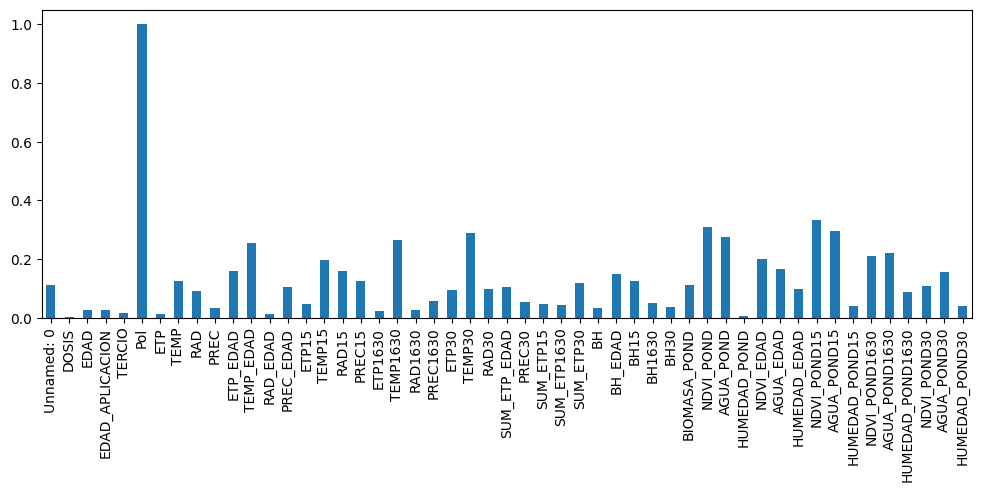

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
corr_matrix = abs(newdf.corr()['Pol'])
corr_matrix.plot.bar(figsize=(12,4))